<a href="https://colab.research.google.com/github/UniverseTalker/datascience/blob/inventoAI/inventoAI_ML_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1]import needed Libraries and read the two datasets

* Trusted suppliers with good reputation
* new suppliers to predict dealing with them or no

using
Random Forest model
Logistic regression
Decision Tree
Gaussian NB
Linear support vector
Gradient Boosting



In [1]:
#import needed Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#metrics calculation
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
#read dataset file
iDS=pd.read_excel('/content/drive/MyDrive/suppliersxl.xlsx')
supplier_NeW=pd.read_excel('/content/drive/MyDrive/supplier-predictxl.xlsx')

#check dataset number of (Rows,Columns)
iDS.shape


(115, 17)

[2]dataset which need prediction

In [2]:
supplier_NeW.shape

(17, 16)

In [3]:
iDS.head()

,Supplier Type,Price Competitiveness,Quality of Products,Delivery Time,Reliability,Customer Reviews,Payment Terms,Order Volume,Historical Performance,Lead Time,Customer Support,Contract years,Compliance,Sustainability,Cost of Switching,Compliance issue found,Target
0,1,4,4,10,5,4,1,200,0.95,7,4,2,1,1,0,0,1
1,2,3,3,15,3,3,2,50,0.85,14,3,1,0,0,10,1,0
2,3,5,5,5,5,5,3,100,0.98,5,5,3,1,1,0,0,1
3,1,4,4,12,4,4,1,150,0.90,10,4,2,1,1,5,0,1
4,2,2,2,20,2,2,2,40,0.80,18,2,1,1,0,10,1,0


[4]we can see here using describe function that no empty values and that data ranges are different and need some normalization and standardization

In [4]:
iDS.describe()

,Supplier Type,Price Competitiveness,Quality of Products,Delivery Time,Reliability,Customer Reviews,Payment Terms,Order Volume,Historical Performance,Lead Time,Customer Support,Contract years,Compliance,Sustainability,Cost of Switching,Compliance issue found,Target
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,2.443478,3.834783,3.834783,10.026087,3.869565,3.834783,1.956522,100.347826,0.893043,10.747826,3.834783,1.956522,0.695652,0.652174,5.000000,0.347826,0.652174
std,1.171229,0.999390,0.999390,4.732235,1.021881,0.999390,0.809931,50.739971,0.057219,4.574612,0.999390,0.809931,0.462144,0.478365,4.188539,0.478365,0.478365
min,1.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,30.000000,0.750000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,6.000000,3.000000,3.000000,1.000000,53.500000,0.865000,7.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,4.000000,4.000000,9.000000,4.000000,4.000000,2.000000,90.000000,0.900000,10.000000,4.000000,2.000000,1.000000,1.000000,5.000000,0.000000,1.000000
75%,3.500000,5.000000,5.000000,12.000000,5.000000,5.000000,3.000000,150.000000,0.940000,15.000000,5.000000,3.000000,1.000000,1.000000,10.000000,1.000000,1.000000
max,4.000000,5.000000,5.000000,22.000000,5.000000,5.000000,3.000000,200.000000,0.980000,20.000000,5.000000,3.000000,1.000000,1.000000,10.000000,1.000000,1.000000


[5] more checking to assure no null values

In [5]:
total = iDS.isnull().sum().sort_values(ascending=False)
percent_1 = iDS.isnull().sum()/iDS.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(35)

,Total,%
Supplier Type,0,0.0
Lead Time,0,0.0
Compliance issue found,0,0.0
Cost of Switching,0,0.0
Sustainability,0,0.0
Compliance,0,0.0
Contract years,0,0.0
Customer Support,0,0.0
Historical Performance,0,0.0
Price Competitiveness,0,0.0


[6] Using heatmap to check if any correlation between columns so we can reduce some columns
but we can see that no correlation and we better use all columns for more accurate prediction

Text(0.5, 1.0, 'Study of correlation ')

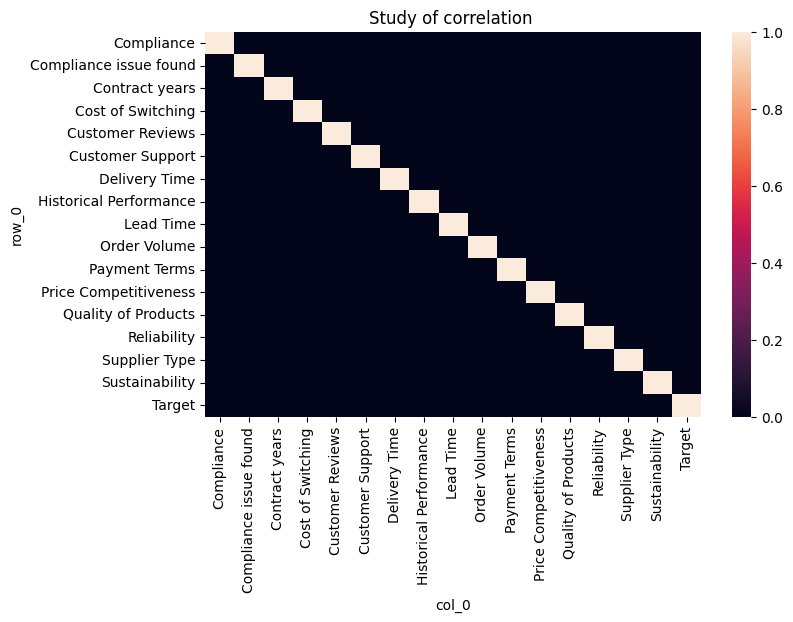

In [9]:
fig = plt.figure(figsize=(8,5))
g = sns.heatmap(pd.crosstab(iDS.columns,iDS.columns))
g.set_title('Study of correlation ')

[8] Normalizing the dataset iDS

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

new_ar= scaler.fit_transform(iDS)
iDS= pd.DataFrame(new_ar, columns=iDS.columns)

[9] normalizing the enrolled_NOW dataset which need prediction (so we can apply the ML model on it )

In [12]:
new_ar_en= scaler.fit_transform(supplier_NeW)
supplier_NeW= pd.DataFrame(new_ar_en, columns=supplier_NeW.columns)

[10] checking iDS for outliers using boxplot from seaborn Library

<Axes: >

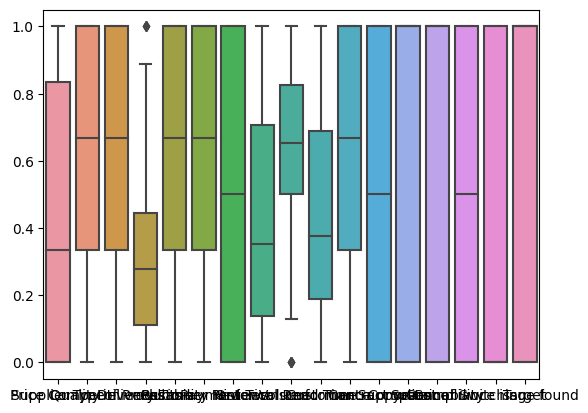

In [13]:
sns.boxplot(data=iDS)

[11] applying outlier removal methode

Supplier Type             0.833333
Price Competitiveness     0.666667
Quality of Products       0.666667
Delivery Time             0.333333
Reliability               0.666667
Customer Reviews          0.666667
Payment Terms             1.000000
Order Volume              0.567647
Historical Performance    0.326087
Lead Time                 0.500000
Customer Support          0.666667
Contract years            1.000000
Compliance                1.000000
Sustainability            1.000000
Cost of Switching         1.000000
Compliance issue found    1.000000
Target                    1.000000
dtype: float64


<Axes: >

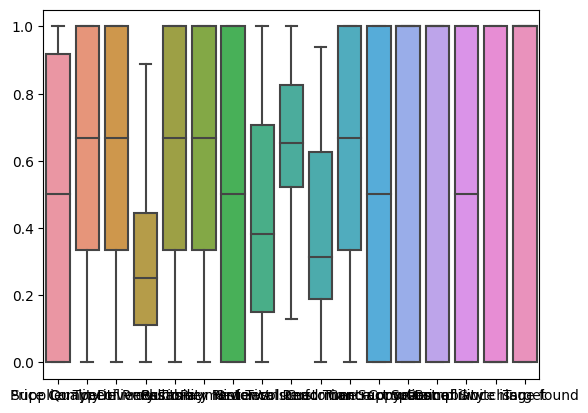

In [14]:
q1=iDS.quantile(0.25)
q3=iDS.quantile(0.75)
iqr=q3-q1
print(iqr)
iDS = iDS[~((iDS < (q1 - 1.5 * iqr)) |(iDS > (q3 + 1.5 * iqr))).any(axis=1)]
sns.boxplot(data=iDS)

[12] checking iDS after outlier removal

In [15]:
iDS.shape

(110, 17)

[13] splitting iDS data into training and testing data

In [6]:
from sklearn.model_selection import train_test_split
X_features=iDS.values[:,0:15]
y_label= iDS.values[:,16]
#Split the data into 80/20
X_train,X_test,y_train,y_test=train_test_split(X_features,y_label,test_size=0.2,random_state=0)

[14] since we still have outliers in the data , applyinh robustScaler to standardize the data  in both datasets
(iDS and Supplier_new)

In [7]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
X_train = rob_scaler.fit_transform(X_train)
X_test = rob_scaler.fit_transform(X_test)
X_enrolled_NOW=rob_scaler.fit_transform(supplier_NeW.values[:,0:15])
#sns.boxplot(data=iDS)

[15] applying PCA methode to reduce components number into 15 replacing 34 (15 is seen good after running the code many times so I chose it )

In [8]:
import sklearn
from sklearn.decomposition import PCA


#apply pca
pca=PCA(n_components=8)
pcaxtrain=pca.fit_transform(X_train)
pcaxtest=pca.fit_transform(X_test)
X_enrolled_pca=pca.fit_transform(X_enrolled_NOW)
pca.n_components_


8

[16] creating first ML model which is Random forest
we can see the two classes 0 and 1 .
checking the accuracy with training data used and then comparing it to the accuracy with testing data used .

where we found the model accuracy is 100 for the training data


In [9]:
#hyperparameters n_estimator with 90,100 ,random_state starting with 0 to 100
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100 ,random_state=0)
random_forest.fit(pcaxtrain, y_train)
Y_prediction = random_forest.predict(pcaxtrain )
print(random_forest.classes_)
acc_random_forest = round(random_forest.score(pcaxtrain, y_train) * 100, 2)
print('Accuracy using Training data',acc_random_forest)
Y_predictionts = random_forest.predict(pcaxtest )
acc_random_forestts = round(random_forest.score(pcaxtest, y_test) * 100, 2)
print('Accuracy using Testing data',acc_random_forestts)

[0. 1.]
Accuracy using Training data 100.0
Accuracy using Testing data 100.0


[21] creating Logistic regression ML model and checking all accuracy and for both training data and testing data from iDS


In [11]:
from sklearn.linear_model import LogisticRegression
classifier2=LogisticRegression(random_state=0)
classifier2.fit(pcaxtrain ,y_train)
print(classifier2.classes_)
predictTrain=classifier2.predict(pcaxtrain)
predict=classifier2.predict(pcaxtest)

[0. 1.]


In [13]:
acc_LR= round(classifier2.score(pcaxtrain, y_train) * 100, 2)
print(acc_LR)
acc_LR2 = round(classifier2.score(pcaxtest, y_test) * 100, 2)
print(acc_LR2)

100.0
100.0


[25] creating Gaussian Naive bayes ML model and checking its accuracy

In [12]:
gaussian = GaussianNB()
gaussian.fit(pcaxtrain, y_train)
Y_pred = gaussian.predict(pcaxtrain)
acc_gaussian = round(gaussian.score(pcaxtrain, y_train) * 100, 2)
print(acc_gaussian)

100.0


[28] creating Decision Tree ML Model
we see that accuracy for training data is 100
and for testing data it is 82.11

and printing the confusion matrix and report

In [14]:
decisiontree=DecisionTreeClassifier()
decisiontree.fit(pcaxtrain,y_train)
Y_predDT=decisiontree.predict(pcaxtrain)
acc_dt1=round(decisiontree.score(pcaxtrain, y_train) * 100, 2)
Y_predDT2=decisiontree.predict(pcaxtest)
acc_dt2=round(decisiontree.score(pcaxtest, y_test) * 100, 2)
print(acc_dt1)
print(acc_dt2)

100.0
100.0


[32] creating Linear support vector ML Model with maximum iteration 10000
and we see the accuracy

In [15]:
svc=LinearSVC(dual=False , max_iter=10000)
svc.fit(pcaxtrain,y_train)
Y_predSVC=svc.predict(pcaxtrain)
acc_svc=round(svc.score(pcaxtrain, y_train) * 100, 2)
print(acc_svc)

100.0


[37] creating GradientBoosting classifier ML Model  with n_estimators=500

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )
gbc.fit(pcaxtrain,y_train)
Y_predgbc = gbc.predict(pcaxtrain)
Y_predgbctest = gbc.predict(pcaxtest)
gbc_acc1 = round(gbc.score(pcaxtrain, y_train) * 100, 2)
gbc_acc2= round(gbc.score(pcaxtest, y_test) * 100, 2)

print("gradient boosting training set accuracy ", gbc_acc1)
print("gradient boosting testing  set accuracy ", gbc_acc2)

gradient boosting training set accuracy  100.0
gradient boosting testing  set accuracy  100.0


[42] creating a comparsion Table between the seven models where we see that the Random forest is the best

note : test score for LR,Linearsvc ,knn and gaussiannb forced to zeros because I did not consider in the previous calculation

In [19]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression',
              'Random Forest',
              'gaussian',
              'Decision Tree',
              'LinearSVC',
               'GradientBoost'
              ],
    'Score': [ acc_LR, acc_random_forest, acc_gaussian, acc_dt1 ,acc_svc ,gbc_acc1 ],
    'Test_score': [0,acc_random_forestts,0,acc_dt2,0,gbc_acc2]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

,Score,Test_score
Model,,
Logistic Regression,100.0,0.0
Random Forest,100.0,100.0
gaussian,100.0,0.0
Decision Tree,100.0,100.0
LinearSVC,100.0,0.0
GradientBoost,100.0,100.0


# [43] Using the Random Forest ML Model to predict if its good to deal with a supplier or not in future depending on same studied features

we see two classes predicted
added to the dataset as new column called
 ['predicted_Target'])

and then we convert the classes from numerical values into 'GOOD' and 'Not Good' values in a new column called e['target_text']


In [20]:
Y_predictiont_true = random_forest.predict(X_enrolled_pca)
supplier_NeW ['predicted_Target']=Y_predictiont_true
supplier_NeW['predicted_Target'].unique()

array([1., 0.])

In [21]:
supplier_NeW.head(10)

,Supplier Type,Price Competitiveness,Quality of Products,Delivery Time,Reliability,Customer Reviews,Payment Terms,Order Volume,Historical Performance,Lead Time,Customer Support,Contract years,Compliance,Sustainability,Cost of Switching,Compliance issue found,predicted_Target
0,1,4,4,10,3,4,1,200,0.95,7,4,2,1,1,0,0,1.0
1,2,3,3,15,3,3,2,50,0.85,14,3,1,0,0,10,1,0.0
2,3,5,5,5,5,5,3,100,0.98,5,5,3,1,1,0,0,1.0
3,1,4,4,12,4,4,1,150,0.90,10,4,2,1,1,0,0,1.0
4,2,2,2,20,2,2,2,40,0.80,18,2,1,1,0,10,1,0.0
5,3,5,5,6,5,5,3,80,0.96,6,5,3,1,1,0,0,1.0
6,1,4,4,8,4,4,1,180,0.92,8,4,2,1,1,5,0,1.0
7,2,3,3,18,3,3,2,60,0.88,16,3,1,0,0,10,1,0.0
8,3,5,5,7,5,5,3,120,0.94,7,5,3,1,1,0,0,1.0
9,1,4,4,9,4,4,1,170,0.91,9,4,2,1,1,5,0,1.0


In [22]:
supplier_NeW.loc[supplier_NeW['predicted_Target']==0 ,'target_text']='NOT GOOD'
supplier_NeW.loc[supplier_NeW['predicted_Target']==1 ,'target_text']='GOOD'
supplier_NeW.head(10)

,Supplier Type,Price Competitiveness,Quality of Products,Delivery Time,Reliability,Customer Reviews,Payment Terms,Order Volume,Historical Performance,Lead Time,Customer Support,Contract years,Compliance,Sustainability,Cost of Switching,Compliance issue found,predicted_Target,target_text
0,1,4,4,10,3,4,1,200,0.95,7,4,2,1,1,0,0,1.0,GOOD
1,2,3,3,15,3,3,2,50,0.85,14,3,1,0,0,10,1,0.0,NOT GOOD
2,3,5,5,5,5,5,3,100,0.98,5,5,3,1,1,0,0,1.0,GOOD
3,1,4,4,12,4,4,1,150,0.90,10,4,2,1,1,0,0,1.0,GOOD
4,2,2,2,20,2,2,2,40,0.80,18,2,1,1,0,10,1,0.0,NOT GOOD
5,3,5,5,6,5,5,3,80,0.96,6,5,3,1,1,0,0,1.0,GOOD
6,1,4,4,8,4,4,1,180,0.92,8,4,2,1,1,5,0,1.0,GOOD
7,2,3,3,18,3,3,2,60,0.88,16,3,1,0,0,10,1,0.0,NOT GOOD
8,3,5,5,7,5,5,3,120,0.94,7,5,3,1,1,0,0,1.0,GOOD
9,1,4,4,9,4,4,1,170,0.91,9,4,2,1,1,5,0,1.0,GOOD


# Thank you
# Done by : inventoAi